In [1]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")
        
# then move to feature extraction
os.chdir("feature_extraction")

print(os.getcwd())

/home/ra/Codes/timescales_filtering/feature_extraction


In [2]:
from utils import load_story_info
from hard_coded_things import featuresets_dict, train_stories, test_stories

import numpy as np

from tqdm.notebook import trange
from typing import Optional
from scipy.signal import periodogram    

import matplotlib.pyplot as plt
import seaborn as sns

Using gpu


In [3]:
from signal_processing import upsample_story
from utils import get_dir

In [6]:
sr = 10

In [8]:
grid_dir, trfile_dir = get_dir(is_bling=True, is_chinese=False)

upsampled_en_bert = upsample_story(
    test_stories[0],
    featureset_name="BERT_all",
    new_sr=sr,
    upsampling_method='linear',
    story_grid_dir=grid_dir,
    story_trfile_dir=trfile_dir,
)

load_grids_for_stories ['wheretheressmoke'] ../data/deniz2019/en/sentence_TextGrids
English text
Extracting embeddings from bert-base-uncased using sentence split type. 171 input sequences.
story_data (1836, 9984)
word_presentation_times (1836,)


In [31]:
from filtering import BandPassFilter, HighPassFilter, LowPassFilter

In [19]:
from hard_coded_things import frequency_to_period_name_dict
from save_features import get_bandpass_values


In [23]:
frequency_centers, bandpass_values = get_bandpass_values()

In [32]:
frequency_centers

[0.375,
 0.1875,
 0.09375,
 0.046875,
 0.0234375,
 0.01171875,
 0.005859375,
 0.00390625]

In [39]:
filters = {}

filters[frequency_centers[0]] = HighPassFilter(fs = sr, fc = frequency_centers[0], bandwidth=bandpass_values[0])

for i in range(1, len(frequency_centers)-1):
    filters[frequency_centers[i]] = BandPassFilter(fs = sr, fc = frequency_centers[i], bandwidth = bandpass_values[i])


filters[frequency_centers[-1]] = LowPassFilter(fs = sr, fc = frequency_centers[-1], bandwidth=bandpass_values[-1])



0.375


/home/ra/Codes/timescales_filtering/feature_extraction/filtering.py:90: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[0].set_xlim(xlim)


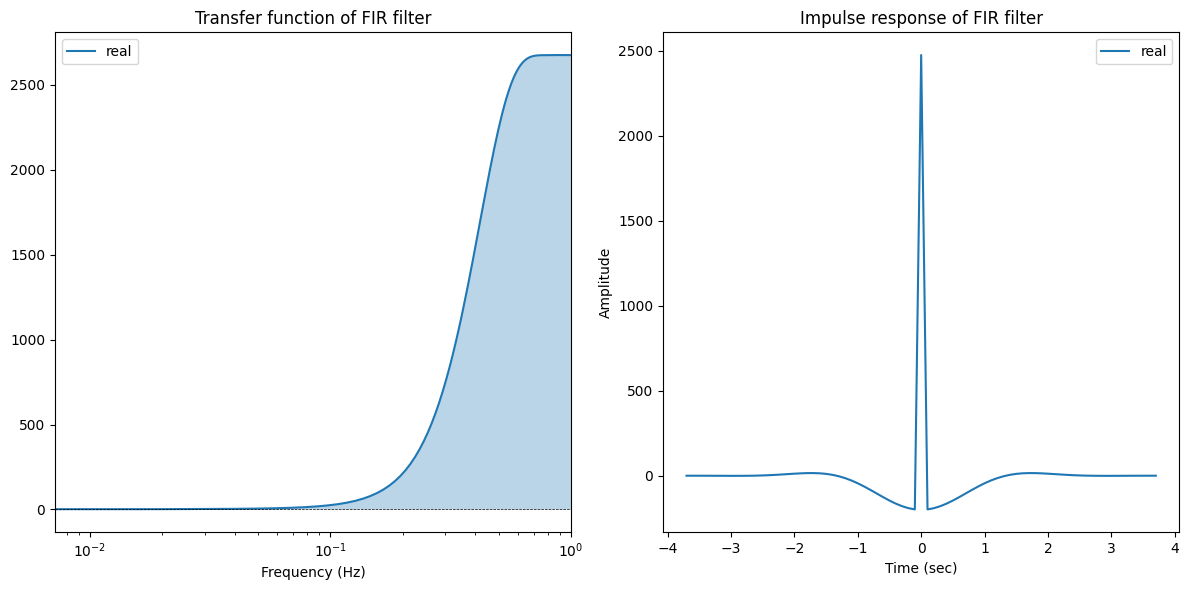

0.1875


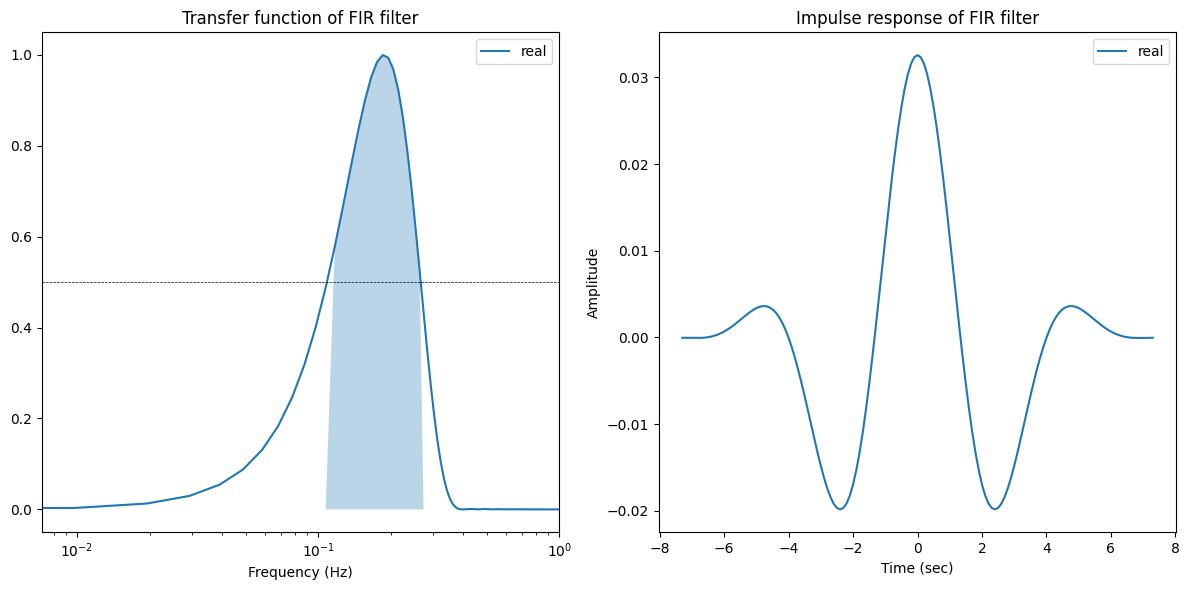

0.09375


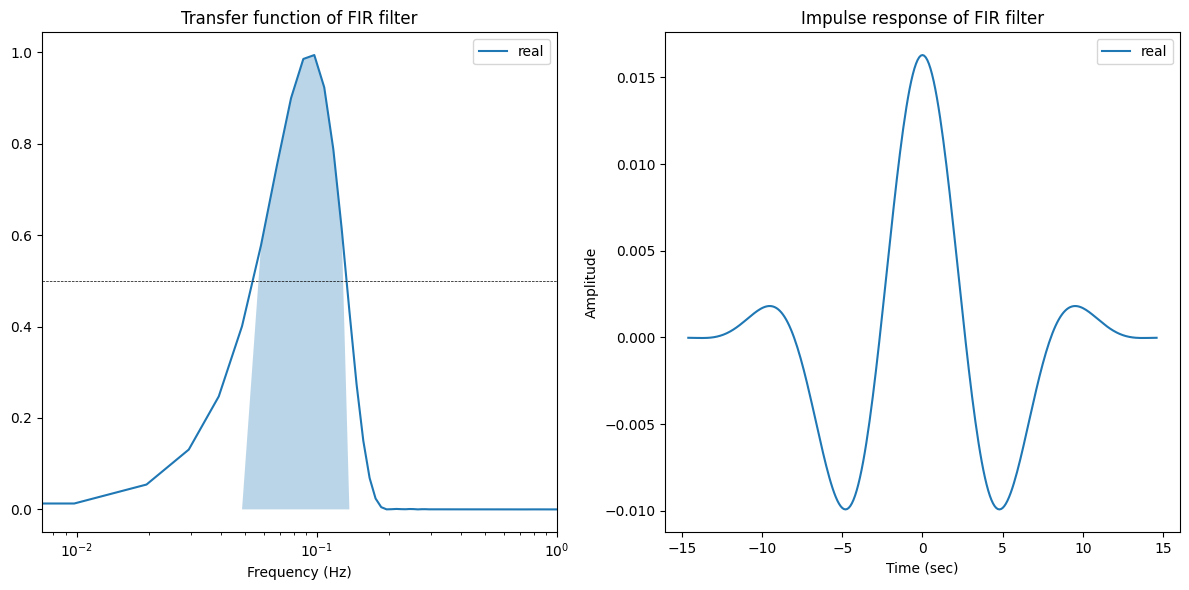

0.046875


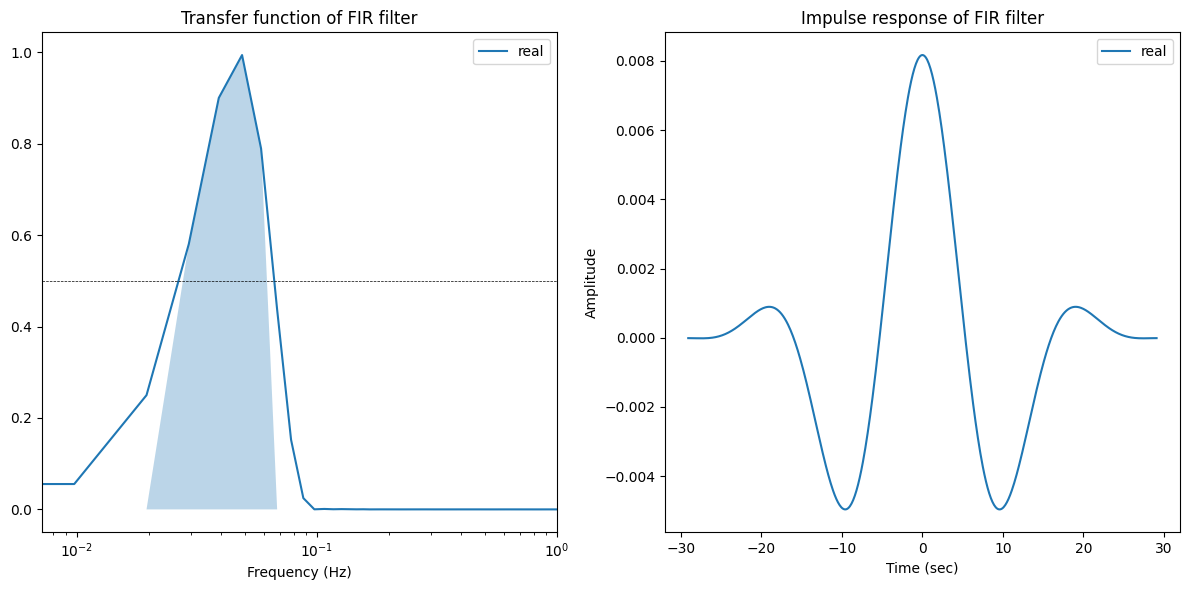

0.0234375


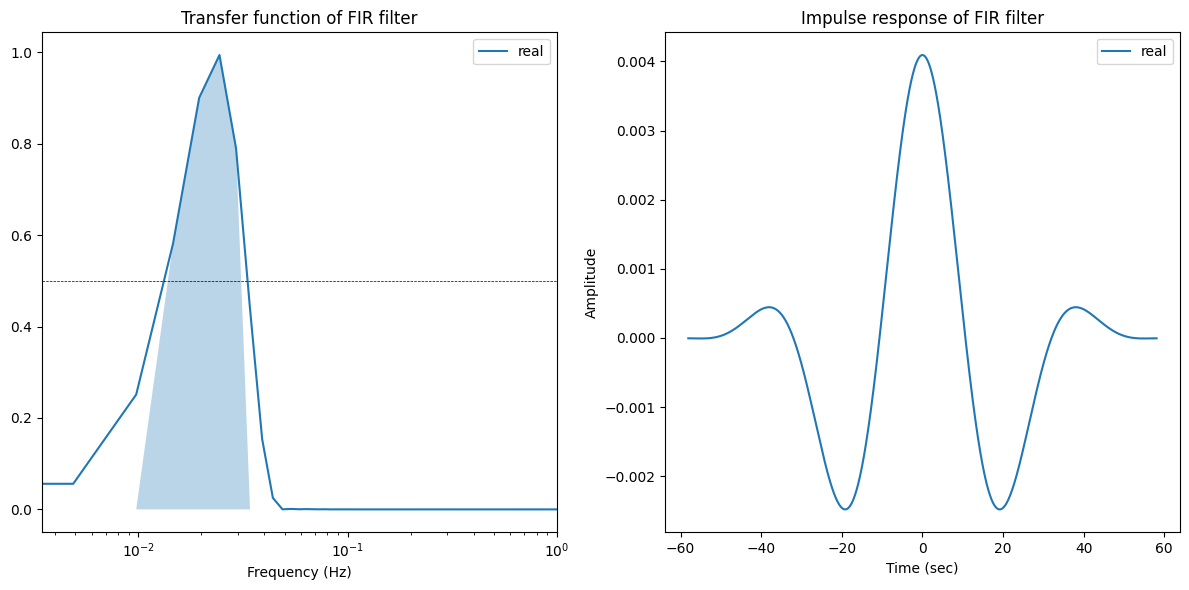

0.01171875


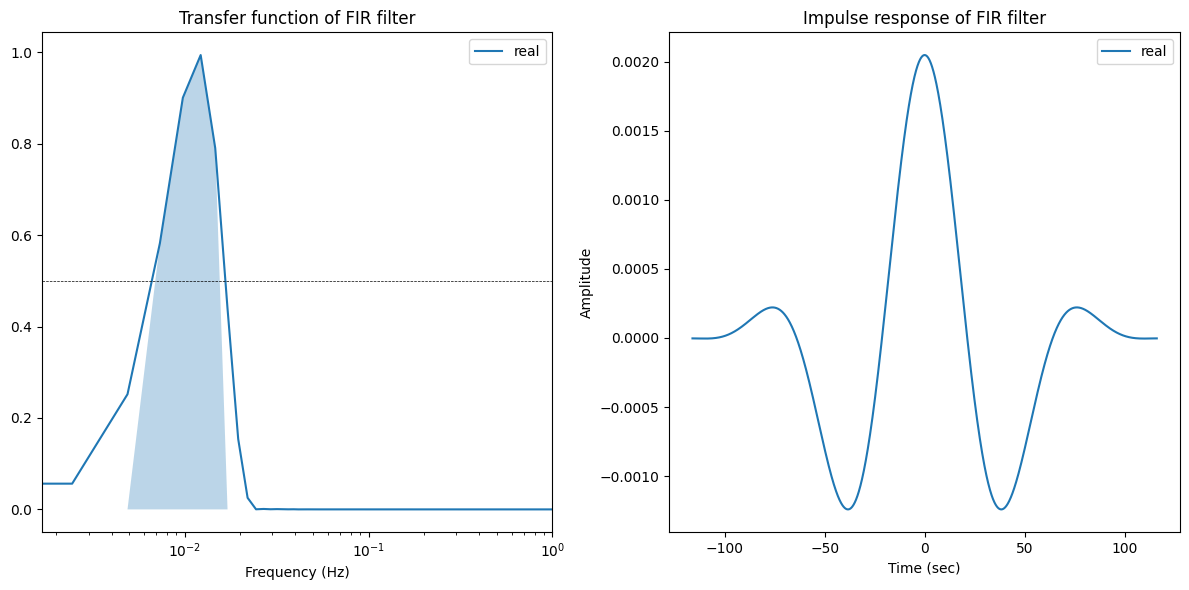

0.005859375


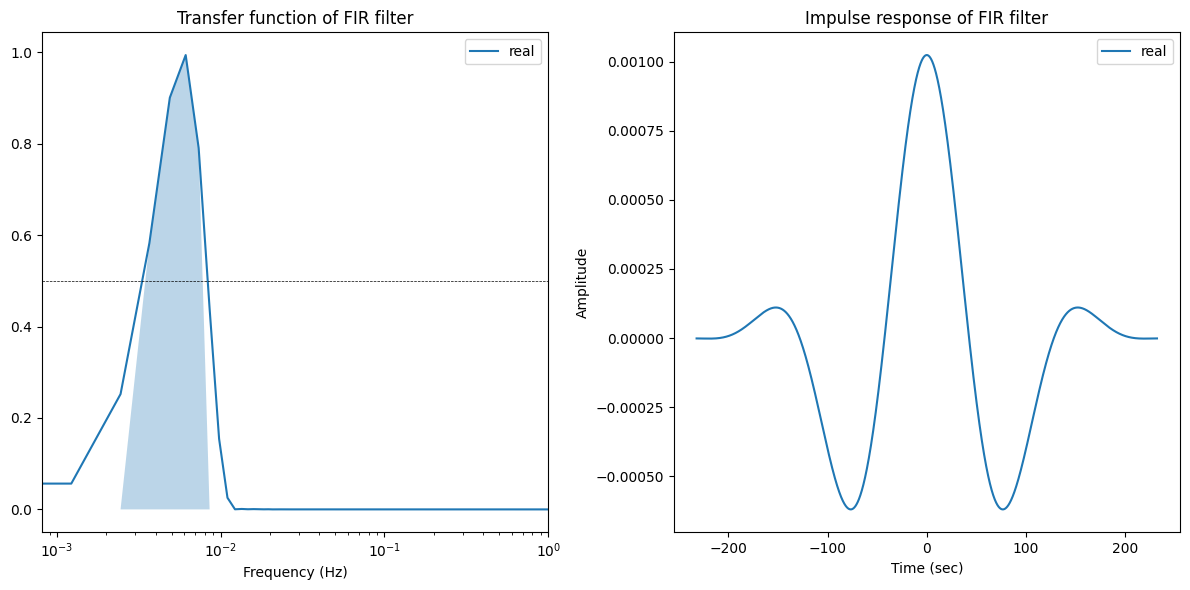

0.00390625


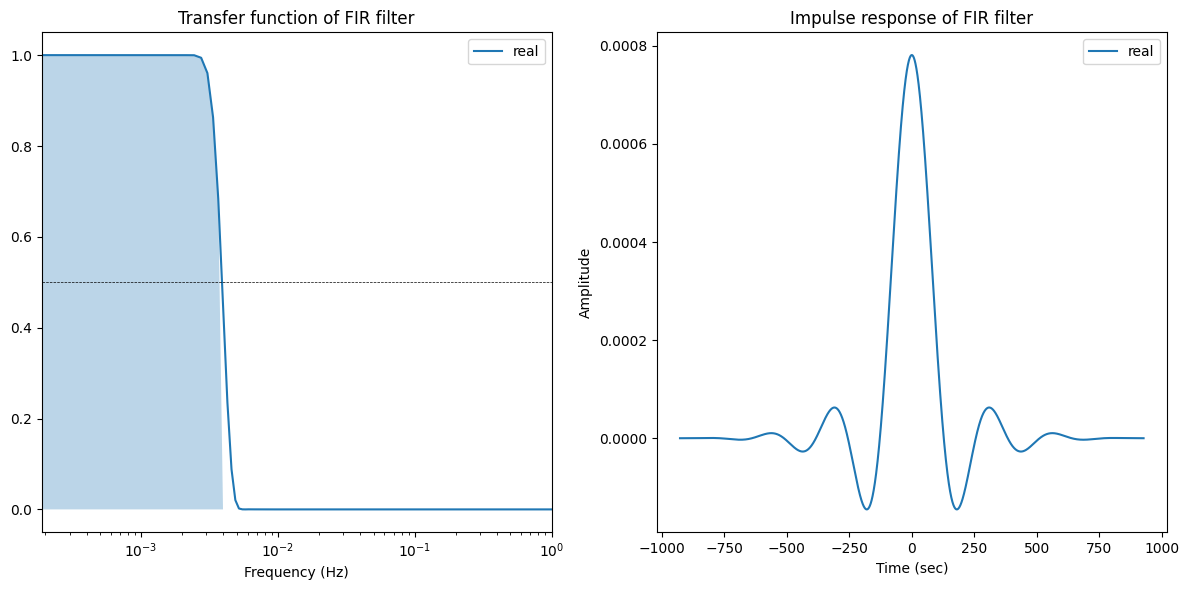

In [43]:
for k in filters.keys():
    print(k)
    filters[k].plot(fscale='log')
    plt.show()